In [3]:
library('rcompanion')
library('car')
library('IDPmisc')
library('dplyr')


Attaching package: 'dplyr'


The following object is masked from 'package:car':

    recode


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
suicide <- read.csv("C:/Users/minel/OneDrive/Documents/Entity Coursework/DSO105C (Oct 3 - Oct 23)/Lesson 6/suicide.csv")

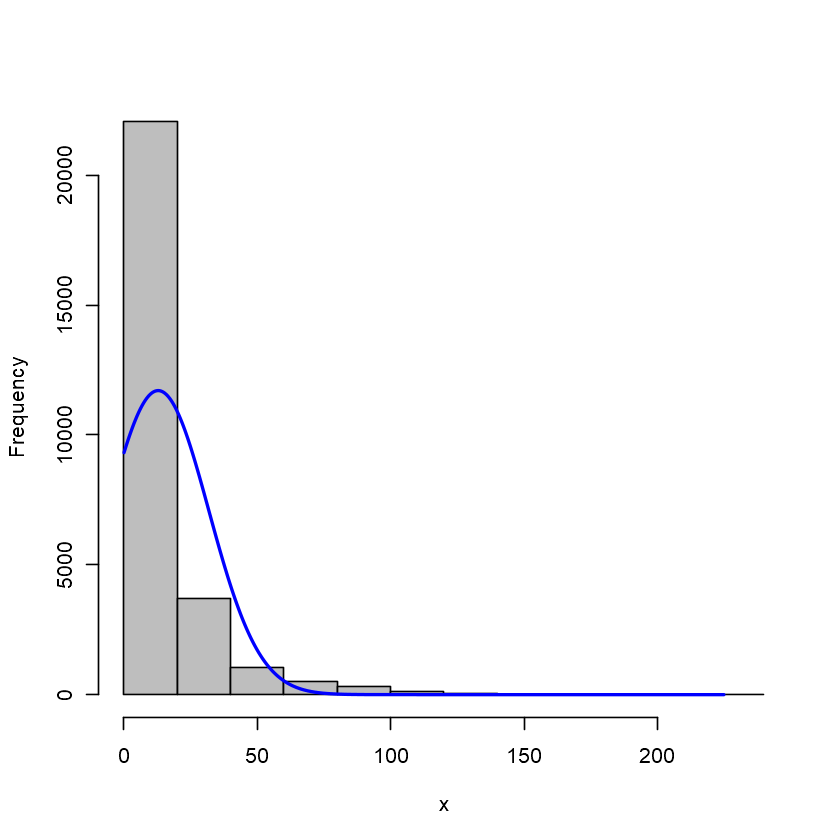

In [5]:
plotNormalHistogram(suicide$suicides.100k.pop)

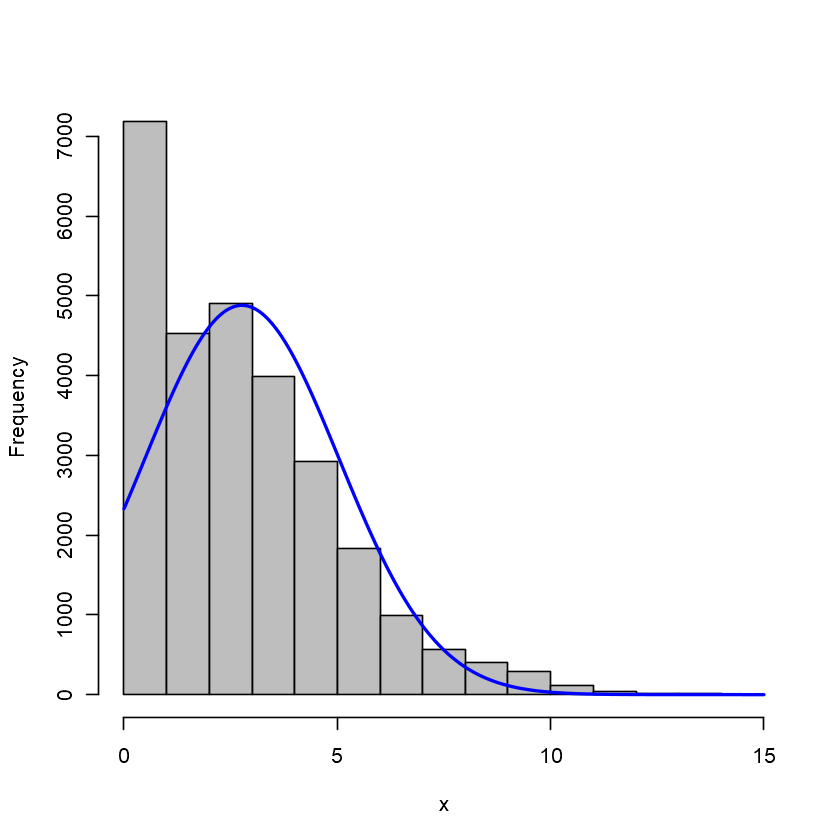

In [6]:
suicide$suicides.100k.popSQRT <- sqrt(suicide$suicides.100k.pop)
plotNormalHistogram(suicide$suicides.100k.popSQRT)

In [7]:
suicide$suicides.100k.popLOG <- log(suicide$suicides.100k.pop)

In [8]:
suicide4 <- NaRV.omit(suicide)

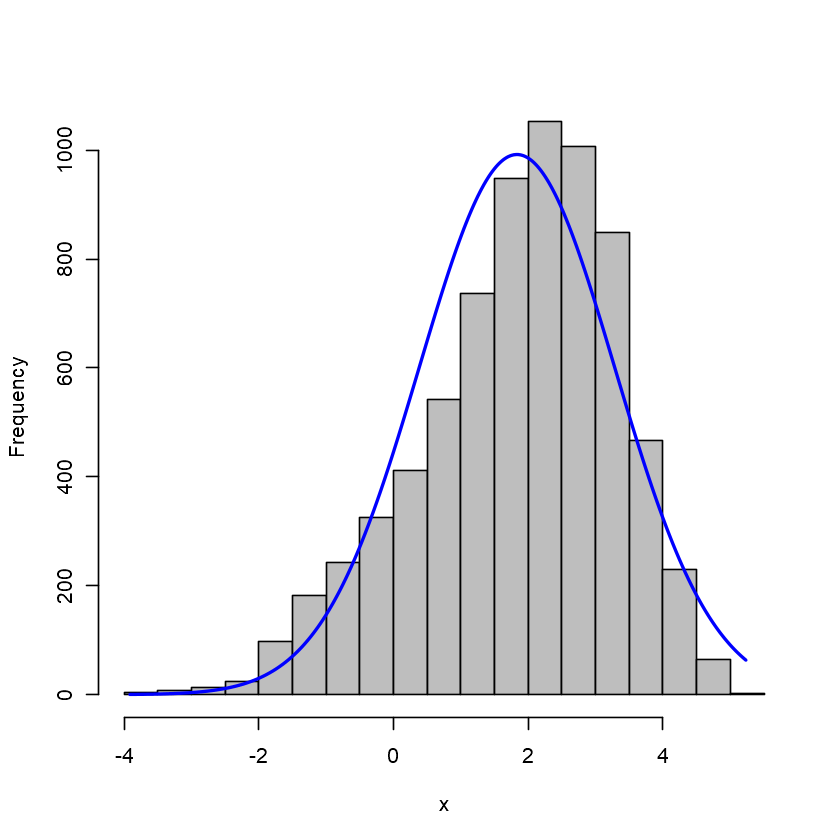

In [9]:
plotNormalHistogram(suicide4$suicides.100k.popLOG)

In [10]:
leveneTest(suicides.100k.popLOG ~ generation, data=suicide4)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,5,18.17709,5.712815e-18
,7201,NA,NA


In [11]:
RManova1 <- aov(suicides.100k.popLOG~(generation*year)+Error(ï..country/(year)), suicide4)
summary(RManova1)

Warning message in aov(suicides.100k.popLOG ~ (generation * year) + Error(ï..country/(year)), :
"Error() model is singular"



Error: ï..country
                Df Sum Sq Mean Sq F value Pr(>F)  
generation       5  377.6   75.53   2.098 0.0746 .
year             1    4.3    4.25   0.118 0.7320  
generation:year  5   84.6   16.92   0.470 0.7975  
Residuals       77 2771.7   36.00                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Error: ï..country:year
                Df Sum Sq Mean Sq F value   Pr(>F)    
generation       5  35.50   7.101   4.638 0.000942 ***
year             1   0.73   0.729   0.476 0.492386    
generation:year  5  33.33   6.666   4.354 0.001528 ** 
Residuals       77 117.89   1.531                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Error: Within
                  Df Sum Sq Mean Sq F value Pr(>F)    
generation         5   4723   944.5    1087 <2e-16 ***
generation:year    5    886   177.2     204 <2e-16 ***
Residuals       7020   6099     0.9                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0

In [12]:
pairwise.t.test(suicide4$suicides.100k.popLOG, suicide4$generation, p.adjust="bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  suicide4$suicides.100k.popLOG and suicide4$generation 

                Boomers G.I. Generation Generation X Generation Z Millenials
G.I. Generation 6.5e-16 -               -            -            -         
Generation X    1.2e-13 < 2e-16         -            -            -         
Generation Z    < 2e-16 < 2e-16         < 2e-16      -            -         
Millenials      < 2e-16 < 2e-16         < 2e-16      < 2e-16      -         
Silent          1.2e-05 2.0e-05         < 2e-16      < 2e-16      < 2e-16   

P value adjustment method: bonferroni 

In [13]:
suicideMeans <- suicide4 %>% group_by(generation, year) %>% summarize(Mean=mean(suicides.100k.pop))

`summarise()` has grouped output by 'generation'. You can override using the `.groups` argument.
